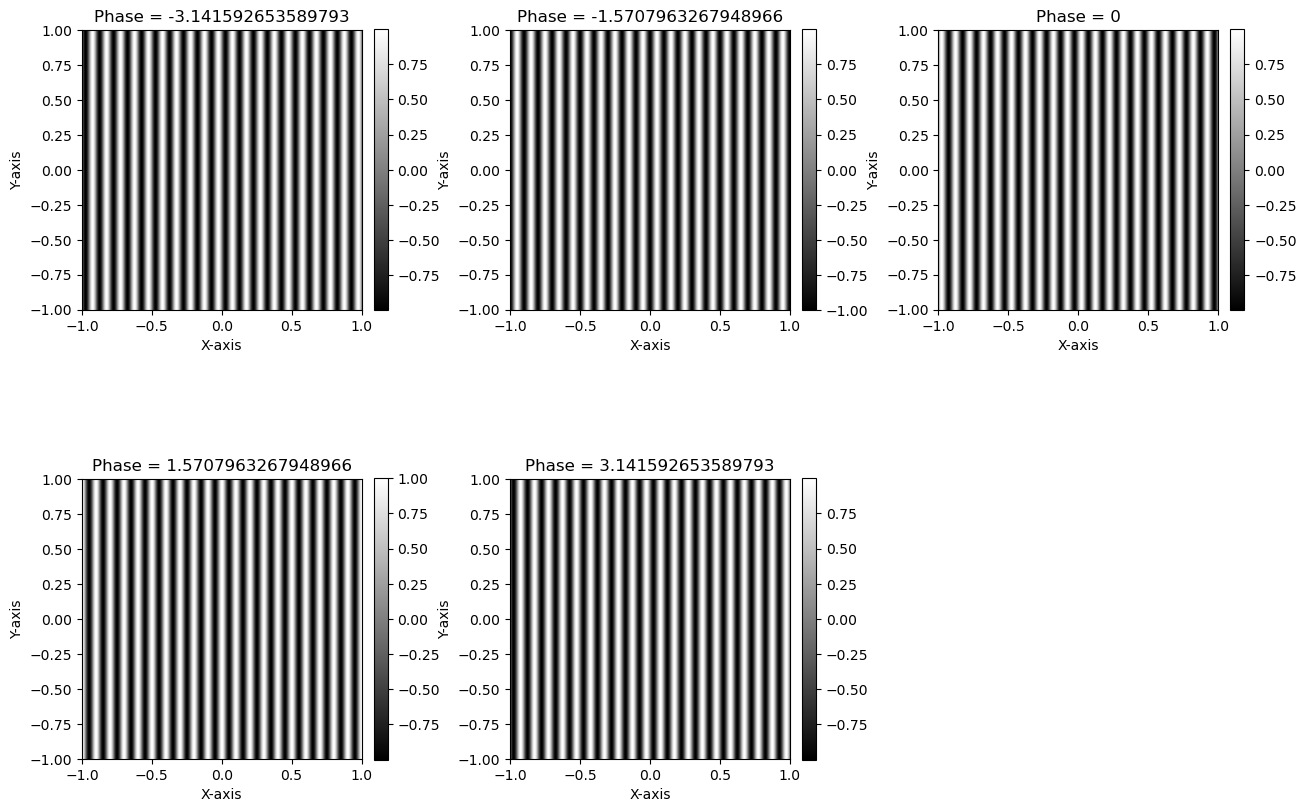

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plane_wave_2d(N, frequency, phase, amplitude=1):
    """Generate a 2D plane wave.
    Parameters:
    - N: Integer, the number of points along each axis.
    - frequency: Frequency of the wave.
    - amplitude: Amplitude of the wave (default is 1).
    - phase: Phase of the wave (default is np.pi).
    Returns:
    - NumPy array representing the values of the 2D plane wave.
    """
    x_values = np.linspace(-1, 1, N)
    y_values = np.linspace(-1, 1, N)
    xg, yg = np.meshgrid(x_values, y_values)
    return amplitude * np.sin(2 * np.pi * frequency * xg + phase)

def projection_modified(frequency, phases):
    N = 1000
    amplitude = 1.0
    nrows = 2
    ncols = (len(phases) + 1) // nrows  # Calculate columns to fit all plots
    
    # Create a figure for displaying the plots in a grid
    fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots
    
    for i, phase in enumerate(phases):
        wave_values = plane_wave_2d(N, frequency, phase, amplitude)
        # Plot in its own figure for saving
        plt.figure()
        plt.imshow(wave_values, extent=(-1, 1, -1, 1), origin='lower', cmap='gray')
        plt.colorbar(label='Amplitude')
        plt.title(f'Phase = {phase}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig(f'phase{i+1}.png')
        plt.close()  # Close the figure to save resources
        
        # Plot on the subplot axes for display
        ax = axs.flatten()[i]
        cax = ax.imshow(wave_values, extent=(-1, 1, -1, 1), origin='lower', cmap='gray')
        fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
        ax.set_title(f'Phase = {phase}')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')

    # Hide remaining axes if they exist
    for j in range(i + 1, nrows * ncols):
        axs.flatten()[j].axis('off')

# Example usage
phases_example = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
projection_modified(10.0, phases_example)
